In [1]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Aula 2

#### WordCloud

In [2]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.probability import FreqDist
import nltk
import urllib.request
from bs4 import BeautifulSoup

In [6]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
petz_mask = np.array(Image.open("imagem.jpg"))

In [ ]:
def transform_format(val):
    val[val == 0] = 255
    return val

In [ ]:
transformed_petz_mask = np.ndarray((petz_mask.shape[0], petz_mask.shape[1]), np.int32)

for i in range(len(petz_mask)):
    transformed_petz_mask[i] = transform_format(transformed_petz_mask[i])

In [3]:
# Coletando um texto da Wikipedia
text_file = urllib.request.urlopen("https://pt.wikipedia.org/wiki/Petz_(empresa)")
response = text_file.read().decode('utf-8')
soup = BeautifulSoup(response, "html.parser")
text = soup.get_text()
text = text.lower()

print(text[1400:2000])

cial

pet center comércio e participações sa


tipo

empresa de capital aberto


cotação

b3: petz3


atividade

varejo, pet shop


fundação

2002


fundador(es)

sergio zimerman


sede

são paulo,  brasil


área(s) servida(s)

 brasil


faturamento

 r$ 920 milhões (2018)[1]


sucessora(s)

pet center marginal


website oficial

petz.com.br


a petz, anteriormente chamada de pet center marginal, é uma rede brasileira de pet shops. é a maior rede de pet shop do brasil e é especializada em serviços e venda de produtos para animais de estimação e animais domésticáveis exóticos.[2]
foi fundada em


In [74]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Petz (empresa) – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"8706b1c0-f5b2-4a3e-a334-f42e53c3cdbe","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Petz_(empresa)","wgTitle":"Petz (empresa)","wgCurRevisionId":62760512,"wgRevisionId":62760512,"wgArticleId":5168018,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Artigos escritos em tom publicitário","Empresas de comércio varejista do Brasil","Empresas de São Paulo (estado)","Empr

In [4]:
# from nltk import word_tokenize
words = word_tokenize(text)

word_no_punct = [word for word in words if word.isalpha()]

In [7]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words("portuguese")

In [11]:
clean_words = [word for word in word_no_punct if word not in stopwords_list]

In [15]:
clean_words_string = " ".join(clean_words)

In [ ]:
wc = WordCloud(background_color = 'black',
              mask = petz_mask,
              mode = 'RGBA',
              max_font_size = 130,
              min_font_size = 10,
              random_state = 24).generate(clean_words_string)

wc.to_file('petz_wordcloud.png')
image_colors = ImageColorGenerator(transformed_petz_mask)

plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func = image_colors), interpolate = 'bilinear')
plt.axis('off')
plt.show()

As palavras ficam no formato do logo

In [16]:
# OUTRO EXEMPLO
words_2 = word_tokenize(text)

print(f"O número de palavras no texto é {len(words_2)}")

O número de palavras no texto é 1188


In [29]:
words_2 # é uma lista

['petz',
 '(',
 'empresa',
 ')',
 '–',
 'wikipédia',
 ',',
 'a',
 'enciclopédia',
 'livre',
 'saltar',
 'para',
 'o',
 'conteúdo',
 'alternar',
 'barra',
 'lateral',
 'busca',
 'criar',
 'uma',
 'conta',
 'ferramentas',
 'pessoais',
 'criar',
 'uma',
 'conta',
 'entrar',
 'páginas',
 'para',
 'editores',
 'conectados',
 'saiba',
 'mais',
 'discussãocontribuições',
 'navegação',
 'página',
 'principalconteúdo',
 'destacadoeventos',
 'atuaisesplanadapágina',
 'aleatóriaportaisinformar',
 'um',
 'erro',
 'colaboração',
 'boas-vindasajudapágina',
 'de',
 'testesportal',
 'comunitáriomudanças',
 'recentesmanutençãocriar',
 'páginapáginas',
 'novascontatodonativos',
 'ferramentas',
 'páginas',
 'afluentesalterações',
 'relacionadascarregar',
 'ficheiropáginas',
 'especiaishiperligação',
 'permanenteinformações',
 'da',
 'páginacitar',
 'esta',
 'páginaelemento',
 'wikidata',
 'imprimir/exportar',
 'criar',
 'um',
 'livrodescarregar',
 'como',
 'pdfversão',
 'para',
 'impressão',
 'idiomas',


In [17]:
# FreqDist: Mostrar a frequência das palavras que mais aparecem na lista
# https://tedboy.github.io/nlps/generated/generated/nltk.FreqDist.html
#from nltk.probability import FreqDist

fdist = FreqDist(words_2)
fdist.most_common(10)

[('de', 63),
 ('.', 36),
 (',', 32),
 ('e', 24),
 ('em', 23),
 ('a', 17),
 ('supermercados', 14),
 ('[', 13),
 (']', 13),
 ('(', 12)]

In [18]:
# tirar punctuation
words_sp = [word for word in words_2 if word.isalpha()]
print(f"O número de palavras no texto é {len(words_sp)}")

O número de palavras no texto é 946


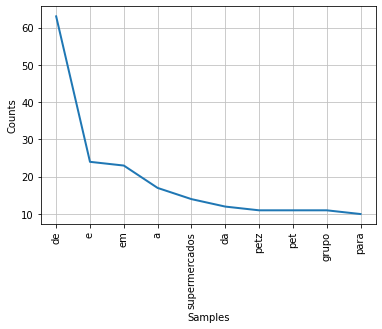

In [20]:
fdist = FreqDist(words_sp)
fdist.plot(10)
plt.show()

In [22]:
clean_words_sp = [word for word in words_sp if word not in stopwords_list]
print(f"O número de palavras no texto é {len(clean_words_sp)}")

O número de palavras no texto é 701


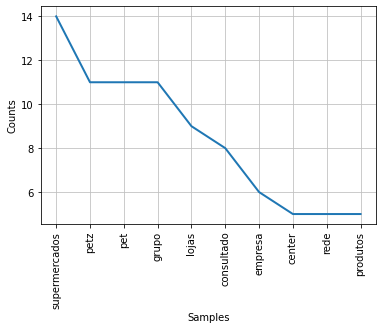

In [23]:
fdist = FreqDist(clean_words_sp)
fdist.plot(10)
plt.show()

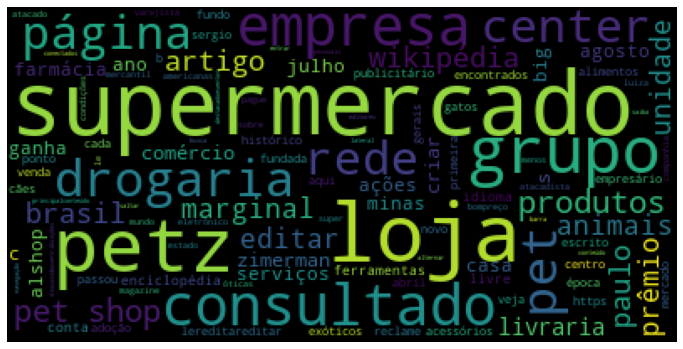

In [76]:
# WordCloud sem imagem
clean_words_sp_string = " ".join(clean_words_sp)

wc = WordCloud(background_color = 'black',
              colormap = 'viridis').generate(clean_words_sp_string)

plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Salvando a imagem
wc.to_file("wordcloud_petz.jpg")

---

#### Bag of Words

In [31]:
import pandas as pd
from nltk.stem import *
import re

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
s_english = set(stopwords.words("english"))

stemmer = PorterStemmer()

In [35]:
movies = pd.read_csv("dataset/5338c257-96d3-4033-bb1a-5eaabe2bad55.csv", index_col = 0)

In [48]:
movies.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [49]:
movies.shape

(50000, 2)

In [45]:
movies_sample = movies.sample(frac = 0.2, replace = False)

In [46]:
movies_sample.shape

(10000, 2)

In [54]:
def pre_text(string):
    string = re.sub(r"[^a-zA-Z0-9]+", " ", string)
    string = string.lower()
    words = word_tokenize(string)
    filter_words = [word for word in words if word not in s_english]
    stem_words = []
    for word in filter_words:
        sw = stemmer.stem(word)
        stem_words.append(sw)
    return stem_words

In [55]:
movies_sample['filtered_words'] = movies_sample["text"].apply(lambda x: pre_text(x))

In [56]:
movies_sample.head()

,text,label,filtered_words
23892,In answer to the person who made the comment a...,1,"[answer, person, made, comment, film, drag, be..."
37565,"Ocean's Twelve: just plain stupid, bad and not...",0,"[ocean, twelv, plain, stupid, bad, noth, compa..."
36142,Another one for the Babes & Bullets crowd. The...,1,"[anoth, one, babe, bullet, crowd, stori, much,..."
4877,"This French film is supposedly about a creepy,...",0,"[french, film, supposedli, creepi, dim, wit, c..."
13662,"""One True Thing"" is a very quiet film, that op...",1,"[one, true, thing, quiet, film, open, fall, 19..."


In [67]:
movies_sample.loc[23892][0] # = movies_sample.iloc[0][0]

"In answer to the person who made the comment about how the film drags on and who believed there was no purpose to the role of Jess's brother here is my response:<br /><br />The role of Jess's brother is to provide a form of dramatic irony in the story. Craig Sheffer/Norman could have foreseen the troubles associated with living life to the full by looking at how Jess's brother turned out. There are various instances where Brad Pitt and his lives run in parallel, for example, when Jess's brother takes Craig Sheffer to a disjointed bar and subsequently he finds Brad Pitt there a few days later. The dramatic irony was there so Craig Sheffer's character would have a bigger emotional turmoil at his brothers death, knowing he could have done more to prevent it and subsequently creates a more compelling mood in the film."

In [68]:
movies_sample['label'].value_counts()

1    5087
0    4913
Name: label, dtype: int64

In [69]:
movies_sample = movies_sample.drop(columns = ['text', 'filtered_words'])

In [70]:
movies_sample.

,label
23892,1
37565,0
36142,1
4877,0
13662,1


stemming reduz a inflexão da palavra para uma raiz, mas altera a palavra. Ex.: change - chang
lemmatização reduz a palavra para uma raiz (mesmo que seja irregular), sem alterar uma palavra com sentido
Representação esparsa : (Bow | One Hot Encoding | tf-idf)

$$tfidf = tf * idf$$

$$tf(t,d) = \frac{count(t)}{len(d)}$$

- t seria a palavra, tokien 
- d no caso, seria uma linha do dataframe ou um documento (capítulo ou mesmo um livro)

$$idf(t,D) = log(\frac{|D|}{n_t})$$

$tfidf = tf * idf$, **tf-idf** determina a importânica de uma palavra (t)

### BoW - Bag of Words: mochila de palavras (CountVectorizer e tf-idf)